In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('data/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [62]:
df.shape

(51717, 17)

In [63]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [65]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Data Cleaning

In [66]:
# Get all columns names
columns = df.columns

In [67]:
# drop unwanted columns
df=df.drop([ 'url','phone', 'location','reviews_list','rest_type'],axis=1)

In [68]:
# cleaning 'approx_cost(for two people)' column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',','').astype('float')



In [69]:
df["dish_liked"].replace(np.nan,"",inplace=True)


In [70]:
# drop all missing values column
df.dropna(inplace=True)

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
# process rate column by removing unkown value and convertig it into specific rate out of 5
df['rate'] = df['rate'].str.replace('NEW','0')
df['rate'] = df['rate'].str.replace('-','0')
df['rate'] = df['rate'].apply(lambda x : x.split('/')[0].strip(' ')).astype('float')

In [73]:
# label encode the online_order and book_table column
encoder = LabelEncoder()
df['online_order'] = encoder.fit_transform(df['online_order'])
df['book_table'] = encoder.fit_transform(df['book_table'])

In [74]:
# count the number of dish liked by each row
df['dish_liked']=df['dish_liked'].apply(lambda x:0 if x=="" else len(x.split(", ")))

In [75]:
# get item variteis per restaurant
df['No_of_Varieties']=df['cuisines'].apply(lambda x:len(x.split(", ")))

In [76]:
# process if menu is available or not
df['menu_item']=df['menu_item'].apply(lambda x: 0 if x=="[]" else 1)

In [77]:
# cost per person 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x:x/2)

In [79]:
# renaming columns for better intuition

change={'name':'Name',
        'address':'Address',
        'online_order':"Delivery",
        'book_table':"Booking", 
        'rate':"Rating", 
        'dish_liked':"dish_liked_no",
        'cuisines':"Cuisines", 
        'approx_cost(for two people)':"CostPerPerson", 
        'listed_in(type)':"Type",
        'menu_item':'Menu',
        'listed_in(city)':"City"}

df.rename(columns=change,inplace=True)

In [93]:
# cleaning cuisine columns by properly categorizing food items
def cl_cuisine(string):
    l = string.split(',')
    if "Afghan" in l:
        l=list(map(lambda x: x.replace('Afghan', 'Afghani'), l))
        
    if "Bubble Tea" in l:
        l=list(map(lambda x: x.replace('Bubble Tea', 'Beverages'), l))
        
    if "Coffee" in l:
        l=list(map(lambda x: x.replace('Coffee', 'Beverages'), l))
        
    if "Cafe" in l:
        l=list(map(lambda x: x.replace('Cafe', 'Beverages'), l))
       
    if "Tea" in l:
        l=list(map(lambda x: x.replace('Tea', 'Beverages'), l))
        
    if "Bubble Beverages" in l:
        l=list(map(lambda x: x.replace('Bubble Beverages', 'Beverages'), l))
       
    if "Ice Cream" in l:
        l=list(map(lambda x: x.replace('Ice Cream', 'Desserts'), l))
        
    if "Mithai" in l:
        l=list(map(lambda x: x.replace('Mithai', 'Desserts'), l))
      
    if "Bar Food" in l:
        l=list(map(lambda x: x.replace('Bar Food', 'Fast Food'), l))
        
    if "Burger" in l:
        l=list(map(lambda x: x.replace('Burger', 'Fast Food'), l))
       
    if "Finger Food" in l:
        l=list(map(lambda x: x.replace('Finger Food', 'Fast Food'), l))
        
    if "Momos" in l:
        l=list(map(lambda x: x.replace('Momos', 'Fast Food'), l))
        
    if "Rolls" in l:
        l=list(map(lambda x: x.replace('Rolls', 'Fast Food'), l))
    
    if "Wraps" in l:
        l=list(map(lambda x: x.replace('Wraps', 'Fast Food'), l))
        
    if "Street Food" in l:
        l=list(map(lambda x: x.replace('Street Food', 'Fast Food'), l))
    if "Juices" in l:
        l=list(map(lambda x: x.replace('Juices', 'Healthy Food'), l))
       
    if "Salad" in l:
        l=list(map(lambda x: x.replace('Salad', 'Healthy Food'), l))
     
    if "Sandwich" in l:
        l=list(map(lambda x: x.replace('Sandwich', 'Healthy Food'), l))
      
    if "Grill" in l:
        l=list(map(lambda x: x.replace('Grill', 'BBQ'), l))
    
    if "Steak" in l:
        l=list(map(lambda x: x.replace('Steak', 'BBQ'), l))
        
    if "Sushi" in l:
        l=list(map(lambda x: x.replace('Sushi', 'Japanese'), l))
        
    if "Tex-Mex" in l:
        l=list(map(lambda x: x.replace('Tex-Mex', 'Mexican'), l))
        
    if "Roast Chicken" in l:
        l=list(map(lambda x: x.replace('Roast Chicken', 'Chinese'), l))
        
    if "Charcoal Chicken" in l:
        l=list(map(lambda x: x.replace('Charcoal Chicken', 'Chinese'), l))
        
    if "Pizza" in l:
        l=list(map(lambda x: x.replace('Pizza', 'Italian'), l))
        
    if "Biryani" in l:
        l=list(map(lambda x: x.replace('Biryani', 'South Indian'), l))
        
    if "Kebab" in l:
        l=list(map(lambda x: x.replace('Kebab', 'North Indian'), l))

    return ", ".join(set(l))

df["Cuisines"]=df["Cuisines"].apply(cl_cuisine)            
    

Data Visualization

In [101]:
numerical_col = df.select_dtypes(exclude='object')
correlation_matrix = numerical_col.corr()

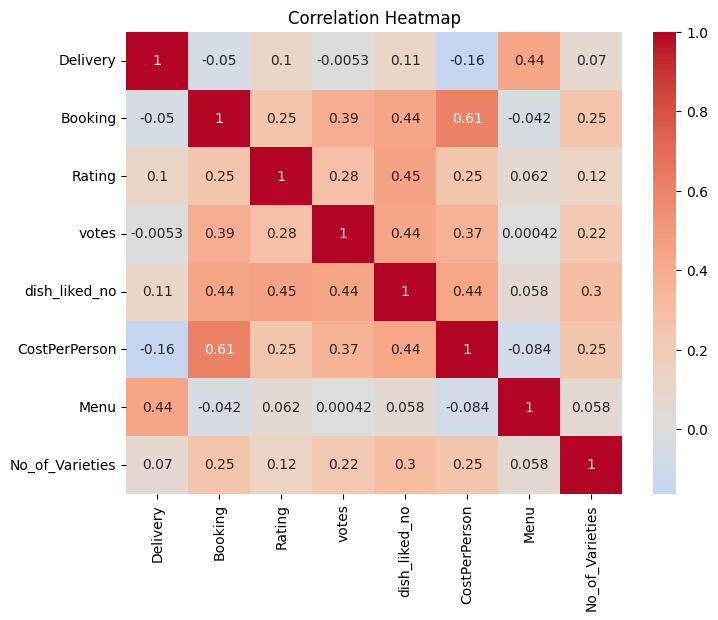

In [102]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

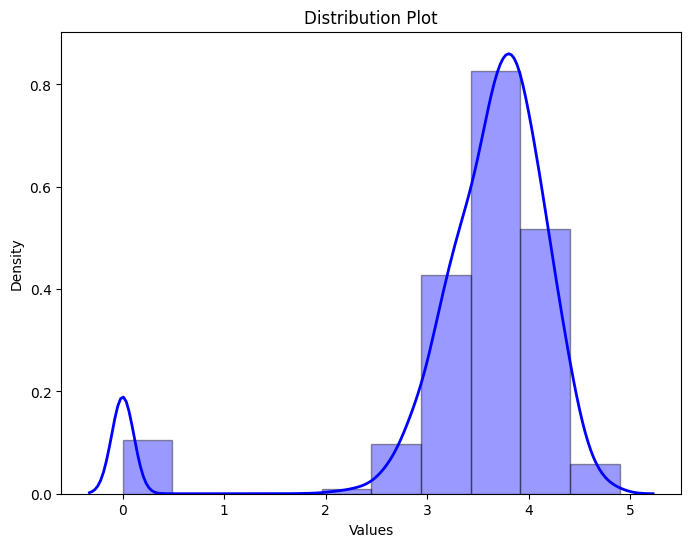

In [112]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Rating'], hist=True, kde=True, bins=10, color='blue',
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Distribution Plot')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

Feature Extraction

In [120]:
new_df=df[['Name','Address','Menu','Delivery', 'Booking', 'dish_liked_no', 'No_of_Varieties', 'Cuisines',
     'CostPerPerson', 'Type', 'City', 'Rating']]
new_df.head()

,Name,Address,Menu,Delivery,Booking,dish_liked_no,No_of_Varieties,Cuisines,CostPerPerson,Type,City,Rating
0,Jalsa,"942, 21st Main Road, 2nd Stage, Banashankari, ...",0,1,1,7,3,"Chinese, North Indian, Mughlai",400.0,Buffet,Banashankari,4.1
1,Spice Elephant,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",0,1,0,7,3,"North Indian, Thai, Chinese",400.0,Buffet,Banashankari,4.1
2,San Churro Cafe,"1112, Next to KIMS Medical College, 17th Cross...",0,1,0,7,3,"Beverages, Italian, Mexican",400.0,Buffet,Banashankari,3.8
3,Addhuri Udupi Bhojana,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",0,0,0,1,2,"South Indian, North Indian",150.0,Buffet,Banashankari,3.7
4,Grand Village,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",0,0,0,2,2,"Rajasthani, North Indian",300.0,Buffet,Banashankari,3.8


Data Preprocessing

In [126]:
multi_label=df["Cuisines"].str.split(", ")

In [129]:
# since cuisine column contain multilabel data so perform Multilabelbinarizer to preprocess it
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_data = mlb.fit_transform(multi_label)
multi_label_df = pd.DataFrame(mlb_data,columns = mlb.classes_)

In [134]:
#extract and concat important features
features = new_df[['Name','Menu','Delivery', 'Booking','Type', 'City','dish_liked_no', 'No_of_Varieties',
         'CostPerPerson', 'Rating']]
data = pd.concat([features,multi_label_df],axis=1)   
data.head()      

,Name,Menu,Delivery,Booking,Type,City,dish_liked_no,No_of_Varieties,CostPerPerson,Rating,...,Seafood,Singaporean,South American,South Indian,Spanish,Tamil,Thai,Tibetan,Turkish,Vietnamese
0,Jalsa,0.0,1.0,1.0,Buffet,Banashankari,7.0,3.0,400.0,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Spice Elephant,0.0,1.0,0.0,Buffet,Banashankari,7.0,3.0,400.0,4.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,San Churro Cafe,0.0,1.0,0.0,Buffet,Banashankari,7.0,3.0,400.0,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Addhuri Udupi Bhojana,0.0,0.0,0.0,Buffet,Banashankari,1.0,2.0,150.0,3.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Grand Village,0.0,0.0,0.0,Buffet,Banashankari,2.0,2.0,300.0,3.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
data.to_csv("data/processed/zomato_data.csv",index=True)

In [ ]:
# df